In [ ]:
import pandas as pd

# 데이터 준비
df = pd.read_csv('합계출산율_전국.csv', index_col=0)
df_ft = df[(df['시점'] < 2000) | (df['시점'] > 2014)]
df_ft.head(), df_ft.shape, df_ft.columns.unique()

(       시점    출생아수  합계출산율
 지역별                     
 전국   2015  438420  1.239
 전국   2016  406243  1.172
 전국   2017  357771  1.052
 전국   2018  326822  0.977
 전국   2019  302676  0.918,
 (9, 3),
 Index(['시점', '출생아수', '합계출산율'], dtype='object'))

In [55]:
sort_df = df_ft.sort_values(by='합계출산율', ascending=False)
sort_df.head()

,시점,출생아수,합계출산율
지역별,,,
전국,2015,438420,1.239
전국,2016,406243,1.172
전국,2017,357771,1.052
전국,2018,326822,0.977
전국,2019,302676,0.918


In [56]:
sort_df.tail(5)

,시점,출생아수,합계출산율
지역별,,,
전국,2019,302676,0.918
전국,2020,272337,0.837
전국,2021,260562,0.808
전국,2022,249186,0.778
전국,2023,230028,0.721


In [45]:
# 데이터 준비
mg_df = pd.read_csv('final_merged_df_correction.csv', index_col=0)
mg_df.head(), mg_df.shape, mg_df.columns.unique()

(          시점  아파트매매가격지수    인구밀도  사교육참여율   고용률  여성초혼연령  인터넷이용률  합계출산율   근로시간
 지역별                                                                        
 강원   2015.01       82.1    90.2    61.6  51.7   29.62    74.1  1.311  173.1
 경기   2015.01       89.6  1227.9    71.7  60.8   30.04    86.3  1.272  175.2
 경남   2015.01      105.3   316.4    65.7  58.3   29.76    86.4  1.437  172.2
 경북   2015.01      109.4   140.8    64.2  59.2   29.55    86.6  1.464  170.6
 광주   2015.01       87.7  2998.5    66.0  57.6   30.09    90.2  1.207  171.5,
 (1728, 9),
 Index(['시점', '아파트매매가격지수', '인구밀도', '사교육참여율', '고용률', '여성초혼연령', '인터넷이용률', '합계출산율',
        '근로시간'],
       dtype='object'))

In [29]:
from sklearn.preprocessing import StandardScaler

mg_df_reset = mg_df.reset_index()
features = mg_df_reset.drop(columns=['지역별'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

array([[-1.5703544 , -1.34160662, -0.56326066, ..., -3.81367076,
         1.50476332,  1.83630099],
       [-1.5703544 , -0.91754252, -0.26068194, ..., -1.10779675,
         1.32106433,  2.17418789],
       [-1.5703544 , -0.029835  , -0.5031013 , ..., -1.08561746,
         2.09825238,  1.69149231],
       ...,
       [ 1.5703544 ,  0.12282807, -0.48990986, ..., -1.66227913,
        -1.17064769, -2.29879114],
       [ 1.5703544 , -0.06376013, -0.51504275, ...,  1.50936008,
        -0.99165892, -1.97699408],
       [ 1.5703544 ,  0.18502414, -0.52772887, ...,  1.33192572,
        -0.43114148, -2.15398246]])

In [37]:
from sklearn.cluster import KMeans

# K-means 클러스터링
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_features)
mg_df_reset['Cluster'] = kmeans.labels_  # 각 지역의 클러스터 번호
mg_df_reset['Cluster'].unique()

array([0, 1])

In [38]:
from sklearn.decomposition import PCA

# PCA를 통한 차원 축소
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

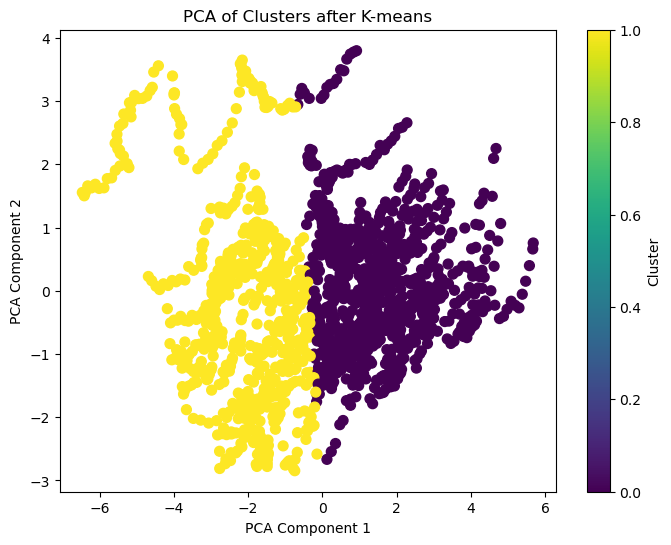

In [ ]:
import matplotlib.pyplot as plt

# PCA 결과 시각화
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=mg_df_reset['Cluster'], cmap='viridis', s=50)
plt.colorbar(label='Cluster')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Clusters after K-means')
plt.show()

In [ ]:
mg_df2012['시점'] = pd.date_range('2012.01', '2012.12', freq='M')
features_2012 = mg_df2012.drop(columns=['지역', '시점'])